Реализация деревьев решений была дважды продемонстрирована в предыдущих уроках, в этом не будем ее повторять и возьмем готовую реализацию дерева решений для регрессии из библиотеки `sklearn`.

In [1]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
import numpy as np

Используем один из "игрушечных" датасетов из той же библиотеки.

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
X, y = load_diabetes(return_X_y=True)

Разделим выборку на обучающую и тестовую в соотношении 75/25.

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

Напишем функцию, реализующую предсказание в градиентном бустинге.

In [5]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

В качестве функционала ошибки будем использовать среднеквадратичную ошибку. Реализуем соответствующую функцию.

In [6]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

Используем $L_{2}$ loss $L(y, z) = (y-z)^{2},$ ее производная по $z$ примет вид $L'(y, z) = 2(z-y)$. Реализуем ее также в виде функции (коэффициент 2 можно отбросить).

In [7]:
def bias(y, z):
    return (y - z)

Реализуем функцию обучения градиентного бустинга.

In [8]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [9]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

#     print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
#     с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

#     print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
#     с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')
    
    return(mean_squared_error(y_train, train_prediction), mean_squared_error(y_test, test_prediction))

In [10]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [11]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

### Домашняя работа:

In [12]:
def process(max_depth, n_trees):
    coefs = [1] * n_trees
    trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    train_error, test_error = evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
    return train_error, test_error

### Зависимость от кол-ва деревьев:

n_trees 1 processed
n_trees 2 processed
n_trees 3 processed
n_trees 4 processed
n_trees 5 processed
n_trees 6 processed
n_trees 7 processed
n_trees 8 processed
n_trees 9 processed
n_trees 10 processed
n_trees 11 processed
n_trees 12 processed
n_trees 13 processed
n_trees 14 processed
n_trees 15 processed
n_trees 16 processed
n_trees 17 processed
n_trees 18 processed
n_trees 19 processed
n_trees 20 processed
n_trees 21 processed
n_trees 22 processed
n_trees 23 processed
n_trees 24 processed


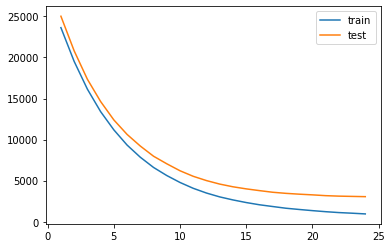

In [13]:
eta = 0.1
max_depth = 5

n_trees_max = 25

errors = []
for n_trees in range(1, n_trees_max):
    train_errors, test_errors = process(max_depth=max_depth, n_trees=n_trees)
    errors.append((n_trees, train_errors, test_errors))
    print(f'n_trees {n_trees} processed')

plt.plot([val[0] for val in errors], [val[1] for val in errors], label='train')
plt.plot([val[0] for val in errors], [val[2] for val in errors], label='test')
plt.legend(loc='upper right')
plt.show()


### Зависимость от максимальной глубины дерева:

max_depth 1 processed
max_depth 2 processed
max_depth 3 processed
max_depth 4 processed
max_depth 5 processed
max_depth 6 processed
max_depth 7 processed
max_depth 8 processed
max_depth 9 processed
max_depth 10 processed
max_depth 11 processed
max_depth 12 processed
max_depth 13 processed
max_depth 14 processed
max_depth 15 processed
max_depth 16 processed
max_depth 17 processed
max_depth 18 processed
max_depth 19 processed
max_depth 20 processed
max_depth 21 processed
max_depth 22 processed
max_depth 23 processed
max_depth 24 processed


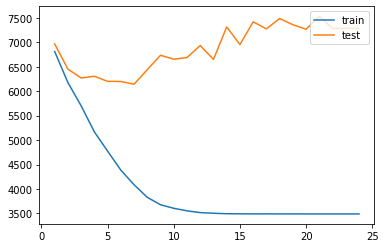

In [16]:
eta = 0.1
n_trees = 10

max_depth_max = 25

errors = []
for max_depth in range(1, max_depth_max):
    train_errors, test_errors = process(max_depth=max_depth, n_trees=n_trees)
    errors.append((max_depth, train_errors, test_errors))
    print(f'max_depth {max_depth} processed')

plt.plot([val[0] for val in errors], [val[1] for val in errors], label='train')
plt.plot([val[0] for val in errors], [val[2] for val in errors], label='test')
plt.legend(loc='upper right')
plt.show()

### Выводы по зависимости ошибки от кол-ва деревьев в ансамбле и предельной глубины дерева:

##### Зависимость ошибки от кол-ва деревьев в ансамбле:

С ростом числа деревьев в модели величина ошибки монотонно убывает, как на обучающей так и на отложенной выборке. При этом с ростом числа деревьев увеличивается разница между величиной ошибки на трейне и на тесте. Таким образом, данный гиперпараметр является хорошим рычагом для увеличения качества модели с предсказуемым поведением и защитой от переобучения. Влияние на ошибку с ростом числа деревьев все уменьшается, соответственно, в какой-то момент наступает точка после которой условные предельные затраты (например, доп. время на обучение) уже не окупают предельный эффект на величину ошибки, либо же при дальнейшем приближении графика к асимптоте график вообще перестанет быть монотонным и начнет все больше шевелиться в духе случайного блуждания.

##### Зависимость ошибки от предельной глубины отдельного обучающего дерева в ансамбле:

Максимальная глубина дерева положительно влияет на качество прогнозов на обучающей выборке, на тестовой выборке поведение функции ошибки от предельной глубины носит следующий характер: до некоторой точки экстремума (с гиперпараметрами из исследования это точка max_depth=7) ошибка монотонно убывает, далее уже не монотонно, но с заметным трендом возрастает, дальше идет что-то похожее на случайное блуждание вокруг значения примерно 7250. Т.о., можно сделать вывод что до некоторого значения гиперпараметра качество прогнозов растут, обобщающая способность модели не страдает, закономерности из данных извлекаются все глубже. После некоторого значения данного гипер-параметра модель сваливается в переобучение, на трейне ошибка практически выходит в горизонтальную линию - полное выучивание данных, на тесте же после такой точки "сваливания" все более переобученная модель начинает давать все худшие прогнозы, а при выходе на вид "случайное блуждание" модель, видимо, начинает предсказывать на уровне рандома.

Предположительно, порог глубины деревьев, после которого наблюдается переобучени будет в разных случаях разным и, вероятно, будет зависеть от: а. размера обучающей выборки и б. кол-ва признаков.

##### Прочие выводы и комментарии:

Елси честно, как-то подозрительно монотонно растет качество предсказаний в зависимости от кол-ва деревьев, особенно на тесте.